In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./excel-generated.csv")
df.head()

,X,Y
0,-10,-38.5
1,-9,-31.5
2,-8,-29.5
3,-7,-29.5
4,-6,-26.5


In [3]:
X = df['X']
Y = df['Y']

In [4]:
m = np.arange(-10, 10, 0.1)
c = np.arange(-10, 10, 0.1)

mc_set = []
for _m in m:
    for _c in c:
        mc_set.append((_m, _c))

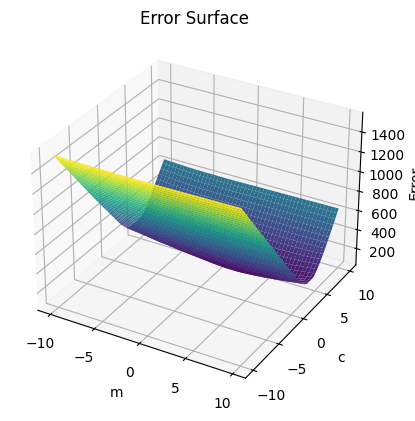

In [5]:
errors = np.zeros(len(mc_set))

for index, (_m, _c) in enumerate(mc_set):
    predicted_y = _m * X + _c
    error = np.sum(np.abs(Y - predicted_y))
    errors[index] = error

errors = errors.reshape(len(m), len(c))

M, C = np.meshgrid(m, c)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, C, errors, cmap='viridis')

ax.set_xlabel('m')
ax.set_ylabel('c')
ax.set_zlabel('Error')
plt.title('Error Surface')
plt.show()

In [5]:
# use same mc set and plot a gradient descent (with plot) to find the optimal m and c values.
# Then with those values, plot a line for the dataset


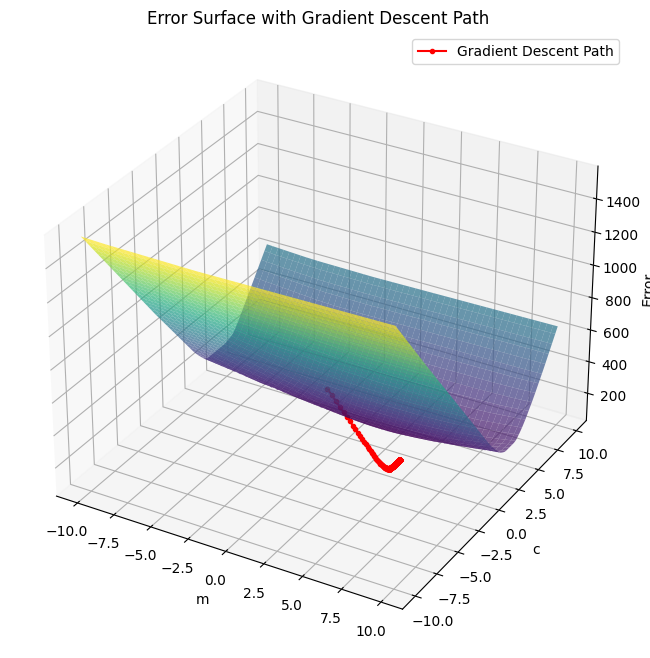

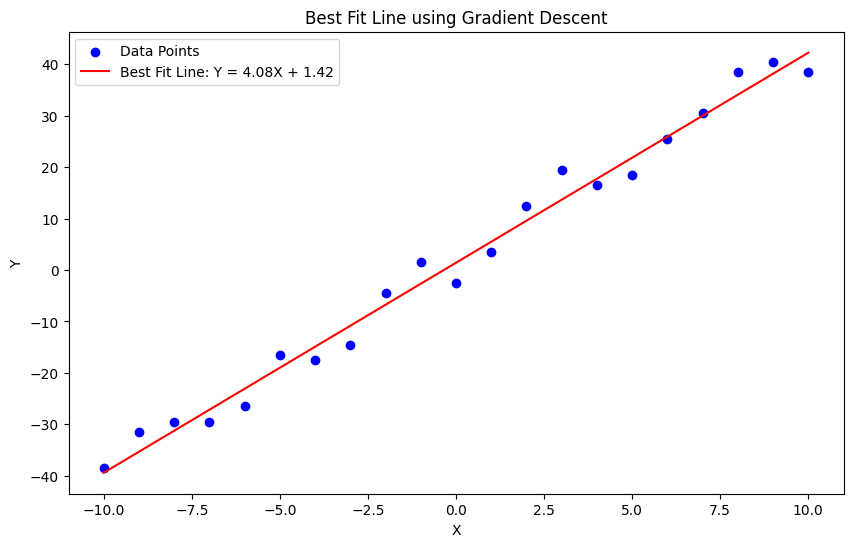

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
df = pd.read_csv("./excel-generated.csv")
X = df['X']
Y = df['Y']

# Create grid of m and c values
m_range = np.arange(-10, 10, 0.1)
c_range = np.arange(-10, 10, 0.1)

# Compute error for each pair of m and c
mc_set = [(m, c) for m in m_range for c in c_range]
errors = np.zeros(len(mc_set))

for index, (m, c) in enumerate(mc_set):
    predicted_y = m * X + c
    error = np.sum(np.abs(Y - predicted_y))
    errors[index] = error

# Reshape the error matrix
errors = errors.reshape(len(m_range), len(c_range))

# Create a meshgrid for m and c values
M, C = np.meshgrid(m_range, c_range)

# 3D Plot for the error surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, C, errors, cmap='viridis', alpha=0.7)

# Labels for axes
ax.set_xlabel('m')
ax.set_ylabel('c')
ax.set_zlabel('Error')
plt.title('Error Surface with Gradient Descent Path')

# Gradient Descent
learning_rate = 0.001
iterations = 1000
m = 0  # Initial m
c = 0  # Initial c
n = float(len(X))  # Number of data points

# Store values of m, c, and error for plotting the descent path
m_history = []
c_history = []
error_history = []

for i in range(iterations):
    predicted_y = m * X + c
    error = np.sum(np.abs(Y - predicted_y))

    # Store m, c, and error values
    m_history.append(m)
    c_history.append(c)
    error_history.append(error)

    # Compute gradients for m and c
    m_grad = -(2/n) * np.sum((Y - predicted_y) * X)
    c_grad = -(2/n) * np.sum(Y - predicted_y)

    # Update m and c
    m = m - learning_rate * m_grad
    c = c - learning_rate * c_grad

# Plot the gradient descent path
ax.plot(m_history, c_history, error_history, color='red', marker='o', markersize=3, label='Gradient Descent Path')

ax.legend()
plt.show()

# Final plot with the best fit line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, m * X + c, color='red', label=f'Best Fit Line: Y = {m:.2f}X + {c:.2f}')
plt.title('Best Fit Line using Gradient Descent')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
